# Business Case: Walmart

## Introduction

### Objective:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

 This notebook covers:

 1. Descriptive Statistics
 2. Univariate/Bivariate and Multivariate Analysis
 3. Inferences
 4. Recommendations

### Dataset Details

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

## Basic Exploration

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [68]:
df1=pd.read_csv('walmart_data.csv')

In [69]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [70]:
df1.shape

(550068, 10)

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [72]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [73]:
df1.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [74]:
print(df1[['Product_ID']].value_counts())
print()
print(df1[['Gender']].value_counts())
print()
print(df1[['Age']].value_counts())
print()
print(df1[['Occupation']].value_counts())
print()
print(df1[['City_Category']].value_counts())
print()
print(df1[['Stay_In_Current_City_Years']].value_counts())
print()
print(df1[['Marital_Status']].value_counts())
print()
print(df1[['Product_Category']].value_counts())

Product_ID
P00265242     1880
P00025442     1615
P00110742     1612
P00112142     1562
P00057642     1470
              ... 
P00077342        1
P00077542        1
P00068342        1
P00074742        1
P00074542        1
Name: count, Length: 3631, dtype: int64

Gender
M         414259
F         135809
Name: count, dtype: int64

Age  
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Occupation
4             72308
0             69638
7             59133
1             47426
17            40043
20            33562
12            31179
14            27309
2             26588
16            25371
6             20355
3             17650
10            12930
5             12177
15            12165
11            11586
19             8461
13             7728
18             6622
9              6291
8              1546
Name: count, dtype: int64

City_Category
B                231173
C                171175
A     

### Observations:

* There are 550068 rows and 10 columns.
* There are no null values in the dataset.
* User_ID, Product_ID, Gender, Occupation, City_Category, Marital_Status and Product_Category are nominal categorical columns.
* Age and Stay_In_Current_City_Years can be classified as ordinal categorical columns.
* Purchase can be classified as numerical column.
* User_ID can be used is a primary user identifier.
* There are much more Males than Females.
* Age is divided in bins of 0-17, 18-25, 26-35 etc with most people in 26-35 group.
* There are three types of city categories- A, B and C with most people in C.
* Stay_In_Current_City_Years is divided into five categories - 0, 1, 2, 3 and 4+.



## Detecting Outliers

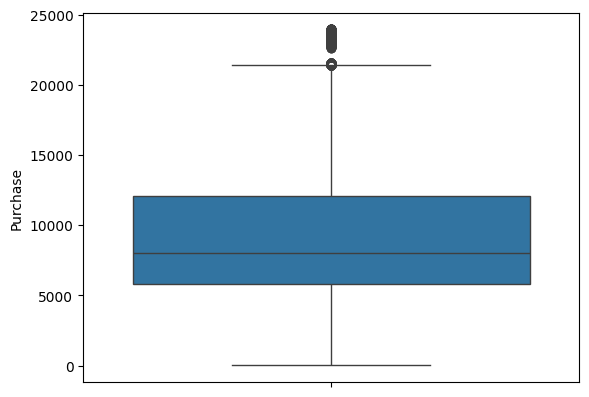

In [75]:
sns.boxplot(data=df1, y='Purchase')

plt.show()

In [76]:
print(f'Difference between median and mean in Purchase: {df1['Purchase'].median() - df1['Purchase'].mean()}')

Difference between median and mean in Purchase: -1216.9687129591257


### Observations:

* Outliers can be seen in Purchase column after a purchase amount of nearly 20000.
* Difference between median and mean in Purchase column is -1216.9687129591257 which means median is significantly lower than mean and the data is right skewed.

## Univariate Analysis

In [77]:
df1_top_products = df1[df1['Product_ID'].isin((df1['Product_ID'].value_counts().reset_index().head())['Product_ID'])]

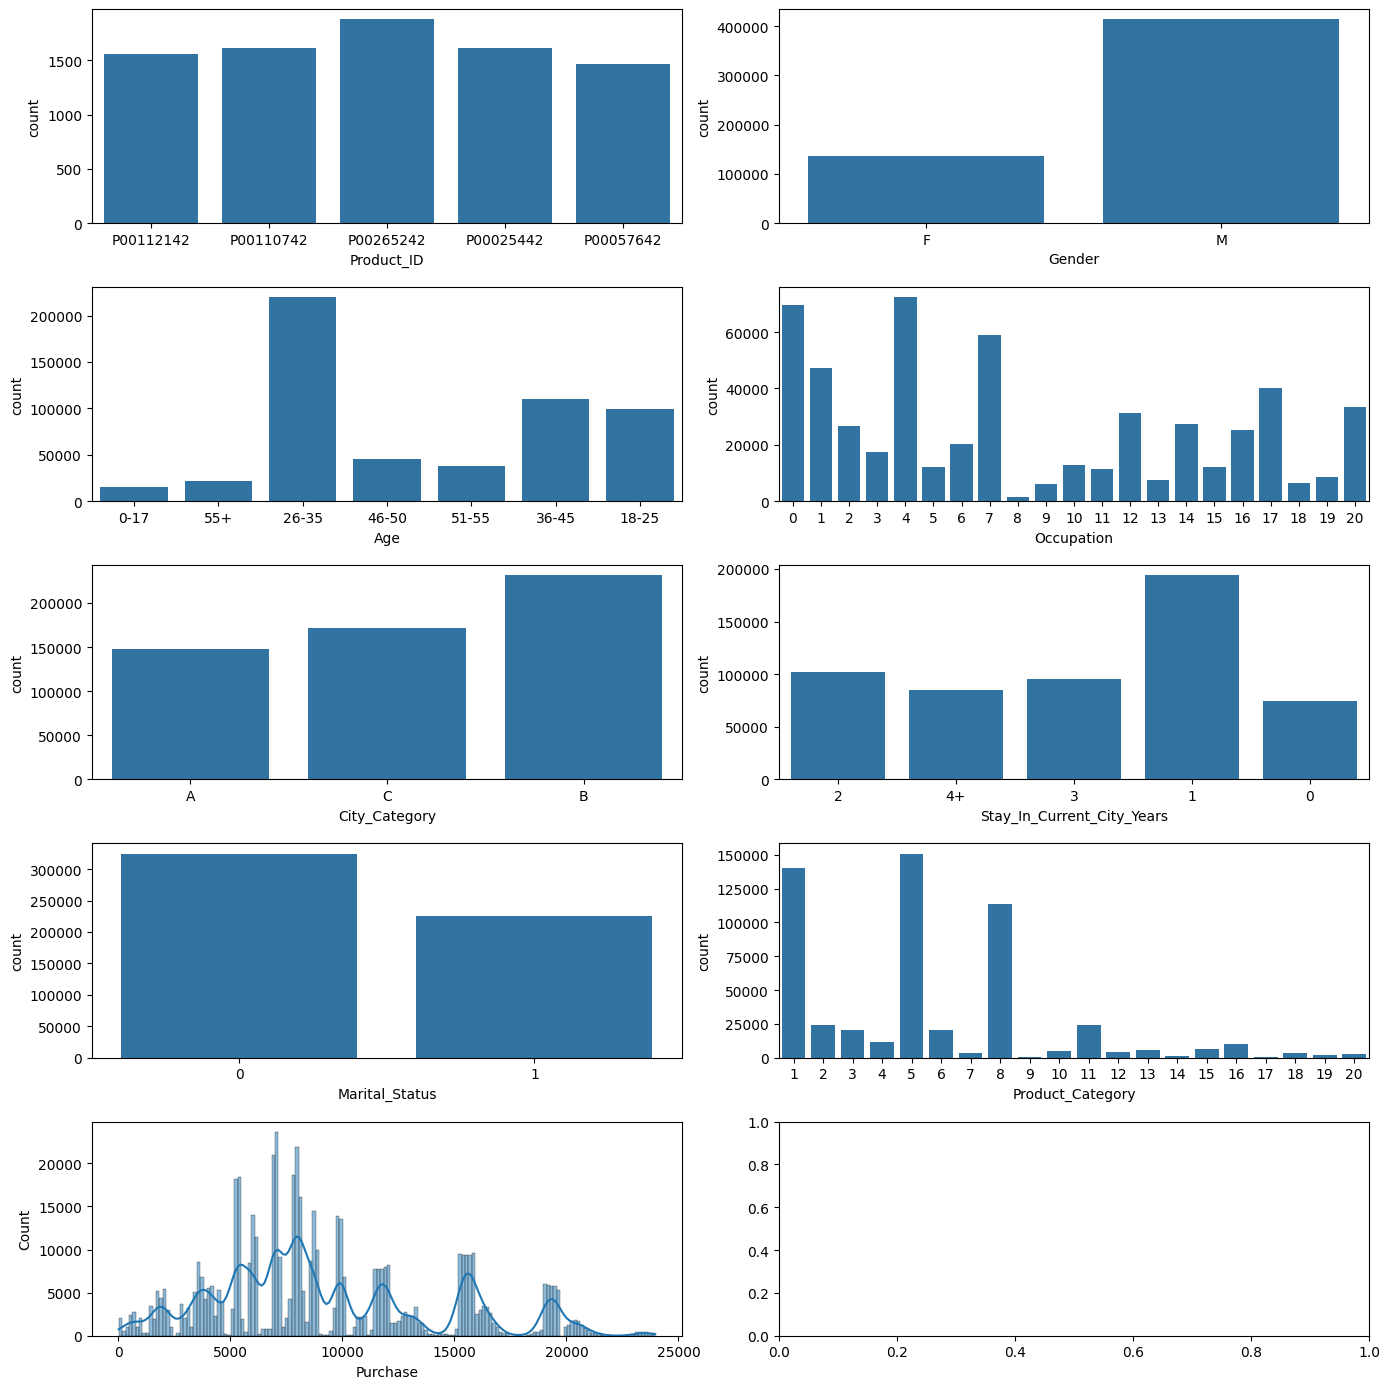

In [78]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))
sns.countplot(data=df1_top_products, x='Product_ID', ax=axis[0,0])
sns.countplot(data=df1, x='Gender', ax=axis[0,1])
sns.countplot(data=df1, x='Age', ax=axis[1,0])
sns.countplot(data=df1, x='Occupation', ax=axis[1,1])
sns.countplot(data=df1, x='City_Category', ax=axis[2,0])
sns.countplot(data=df1, x='Stay_In_Current_City_Years', ax=axis[2,1])
sns.countplot(data=df1, x='Marital_Status', ax=axis[3,0])
sns.countplot(data=df1, x='Product_Category', ax=axis[3,1])
sns.histplot(data=df1, x='Purchase', ax=axis[4,0], kde = True)
plt.tight_layout()
plt.show()

### Observations:

* Males are about 4 times compared to Females.
* Most people are in the age between 26-35.
* Most people live in city category B.
* Mostly people stay in a city for 1 year.
* Most people are unmarried.
* Maximum purchases are in range 5k to 10k.

In [79]:
df1['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

## Bivariate Analysis

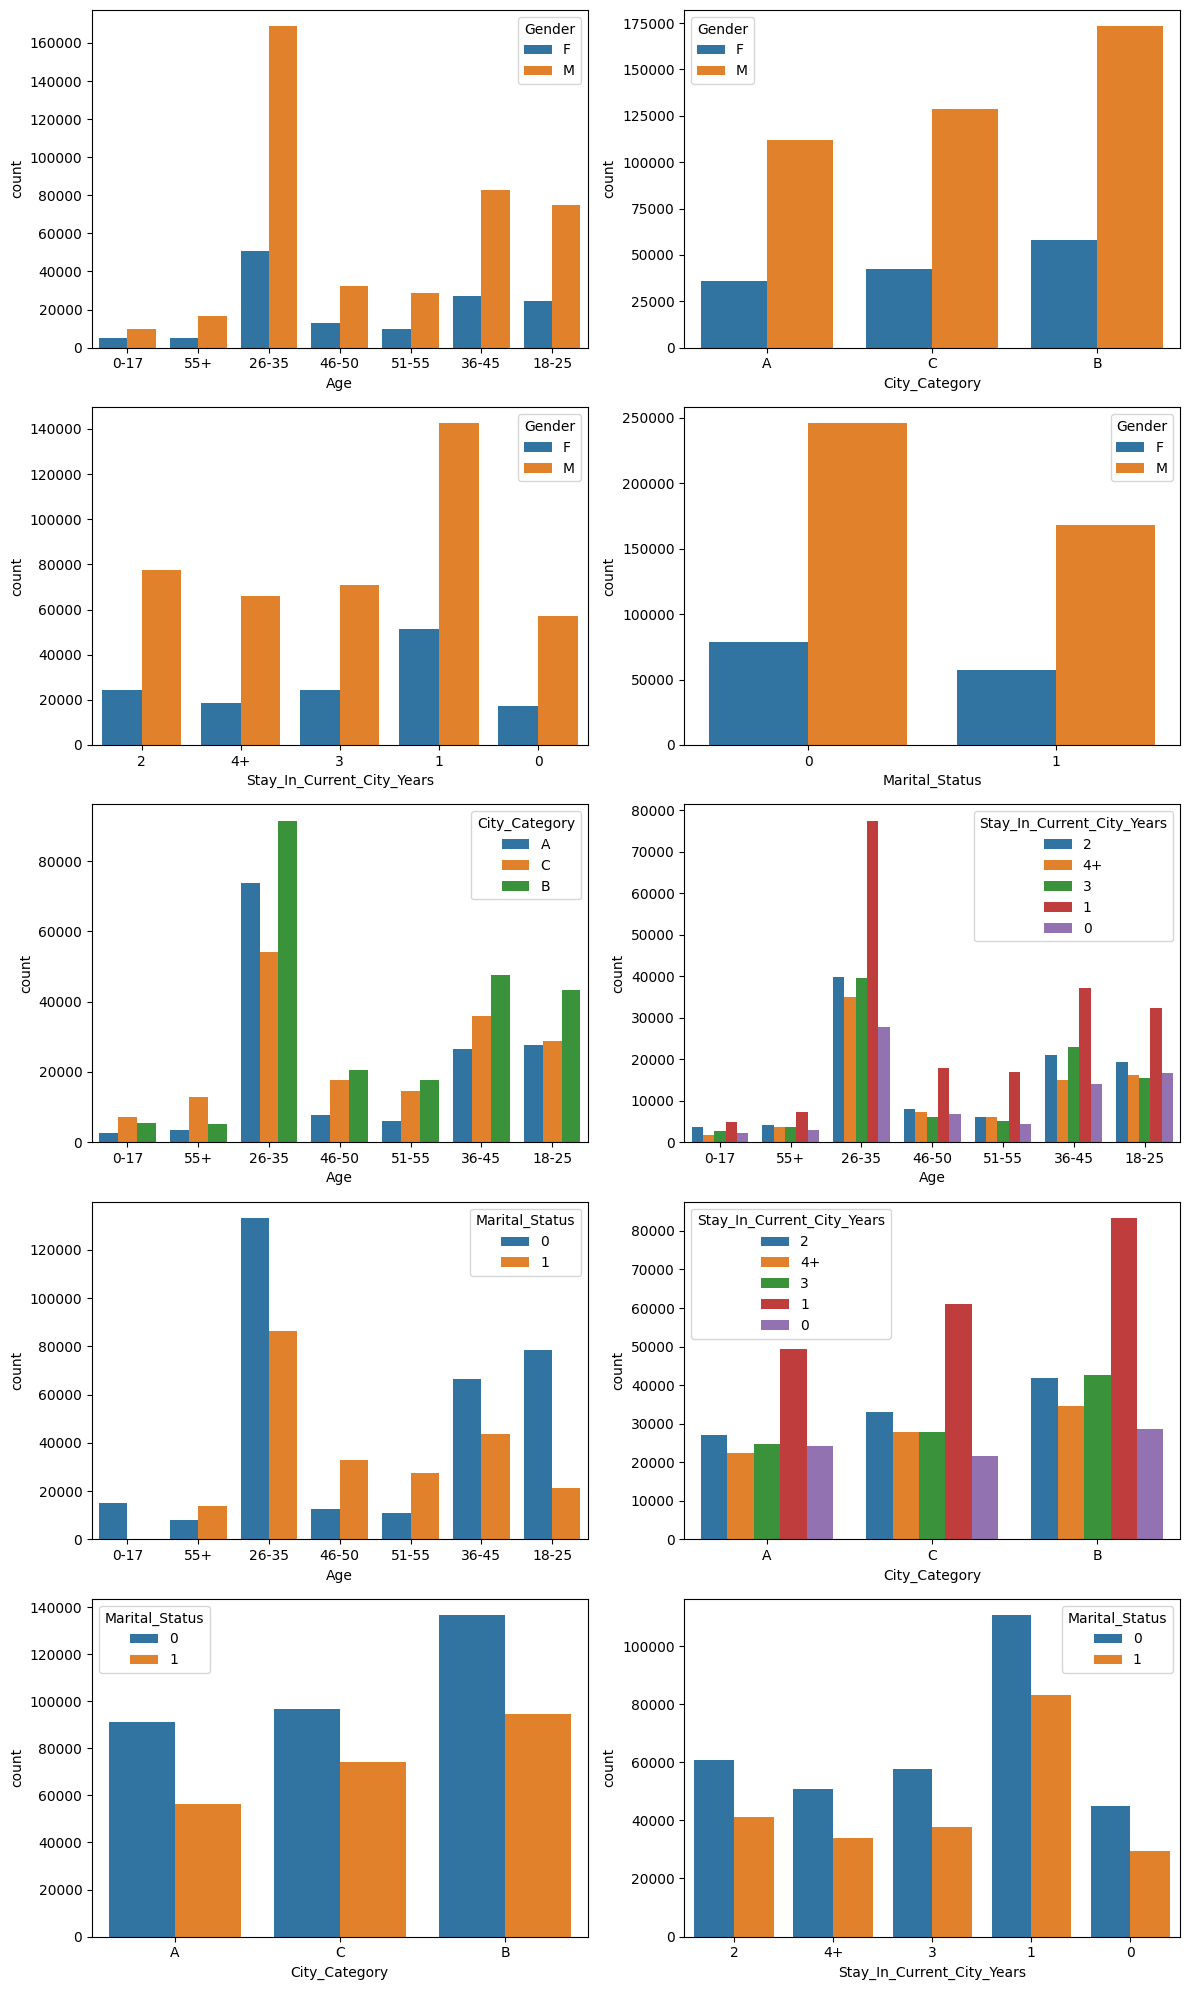

In [80]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

sns.countplot(data=df1, x='Age', hue='Gender', ax=axes[0, 0])
sns.countplot(data=df1, x='City_Category', hue='Gender', ax=axes[0, 1])
sns.countplot(data=df1, x='Stay_In_Current_City_Years', hue='Gender', ax=axes[1, 0])
sns.countplot(data=df1, x='Marital_Status', hue='Gender', ax=axes[1, 1])
sns.countplot(data=df1, x='Age', hue='City_Category', ax=axes[2, 0])
sns.countplot(data=df1, x='Age', hue='Stay_In_Current_City_Years', ax=axes[2, 1])
sns.countplot(data=df1, x='Age', hue='Marital_Status', ax=axes[3, 0])
sns.countplot(data=df1, x='City_Category', hue='Stay_In_Current_City_Years', ax=axes[3, 1])
sns.countplot(data=df1, x='City_Category', hue='Marital_Status', ax=axes[4, 0])
sns.countplot(data=df1, x='Stay_In_Current_City_Years', hue='Marital_Status', ax=axes[4, 1])

plt.tight_layout()
plt.show()

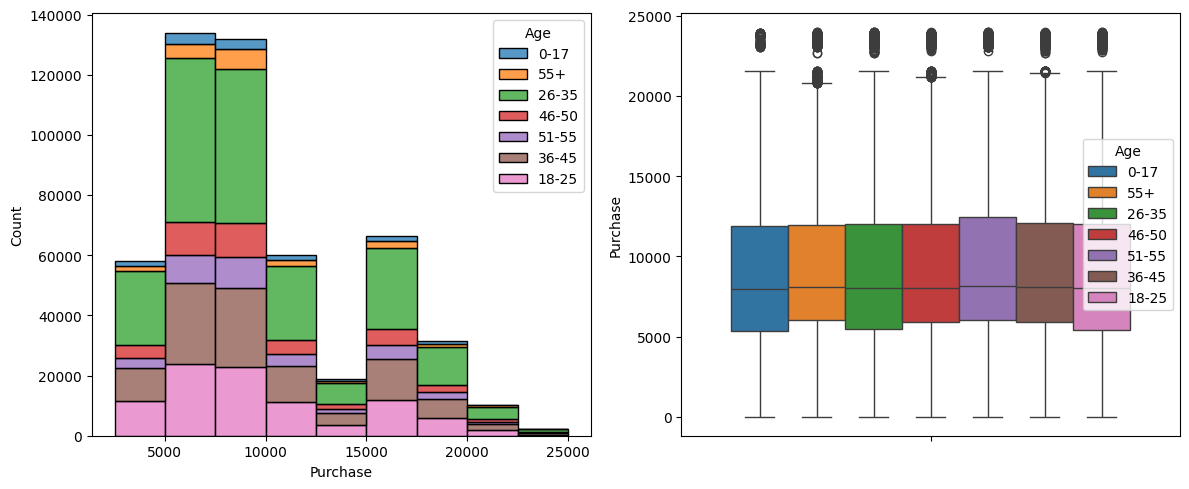

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bins = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
sns.histplot(data=df1, x='Purchase', hue='Age', bins=bins,  multiple='stack', ax=axes[0])
sns.boxplot(data=df1, y='Purchase', hue='Age', ax=axes[1])

plt.tight_layout()
plt.show()

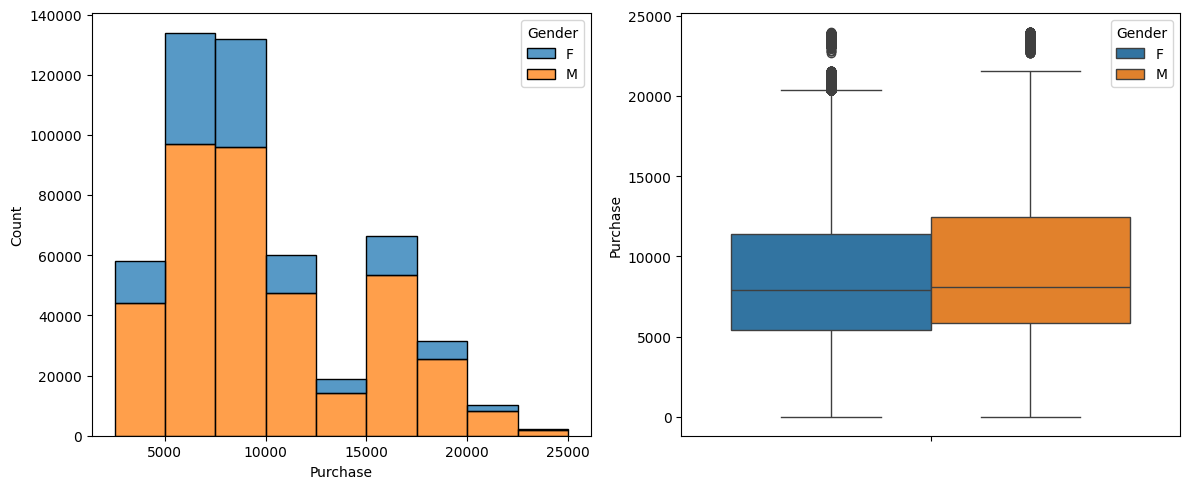

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bins = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
sns.histplot(data=df1, x='Purchase', hue='Gender', bins=bins,  multiple='stack', ax=axes[0])
sns.boxplot(data=df1, y='Purchase', hue='Gender', ax=axes[1])

plt.tight_layout()
plt.show()

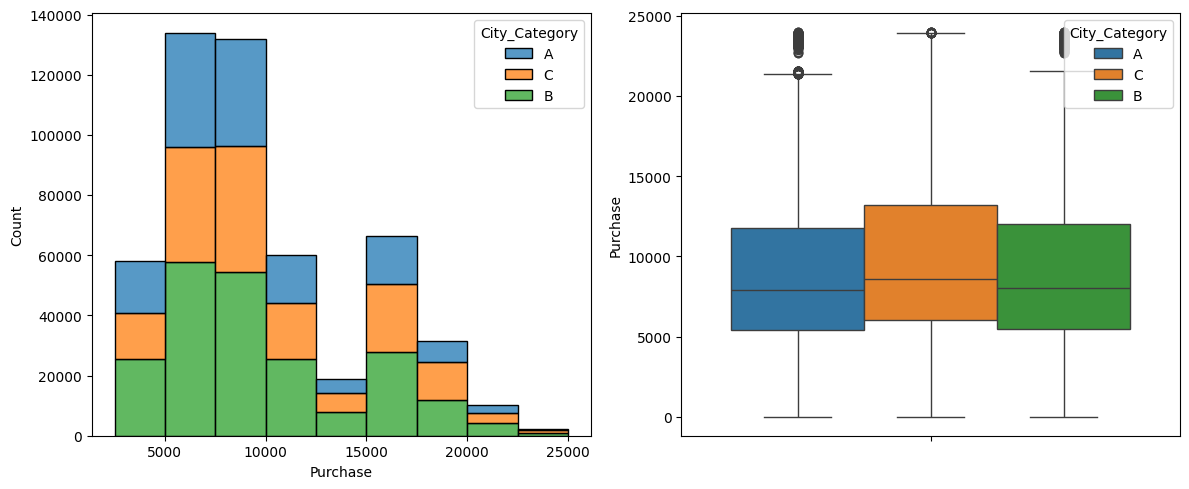

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bins = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
sns.histplot(data=df1, x='Purchase', hue='City_Category', bins=bins,  multiple='stack', ax=axes[0])
sns.boxplot(data=df1, y='Purchase', hue='City_Category', ax=axes[1])

plt.tight_layout()
plt.show()

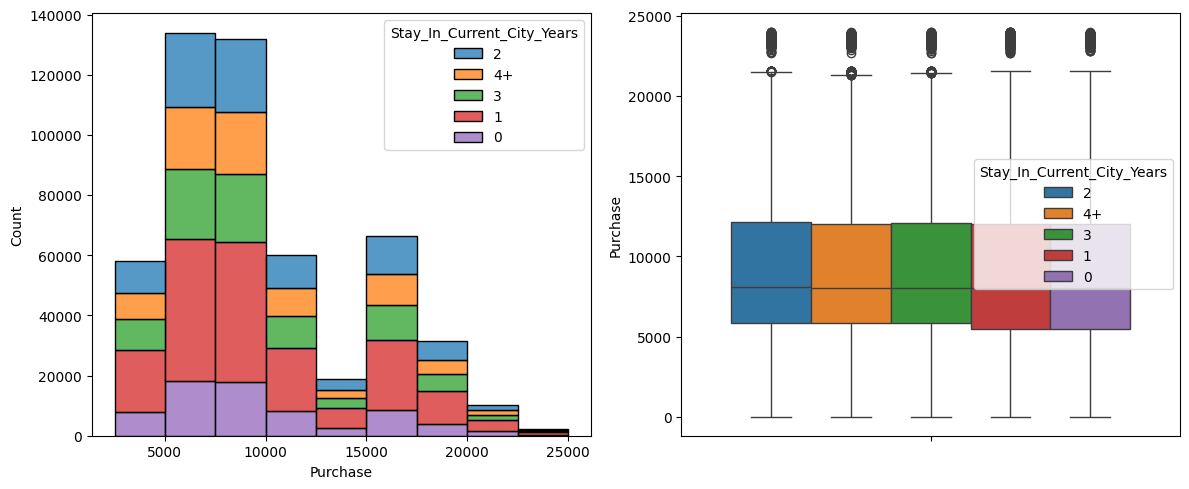

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bins = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
sns.histplot(data=df1, x='Purchase', hue='Stay_In_Current_City_Years', bins=bins,  multiple='stack', ax=axes[0])
sns.boxplot(data=df1, y='Purchase', hue='Stay_In_Current_City_Years', ax=axes[1])

plt.tight_layout()
plt.show()

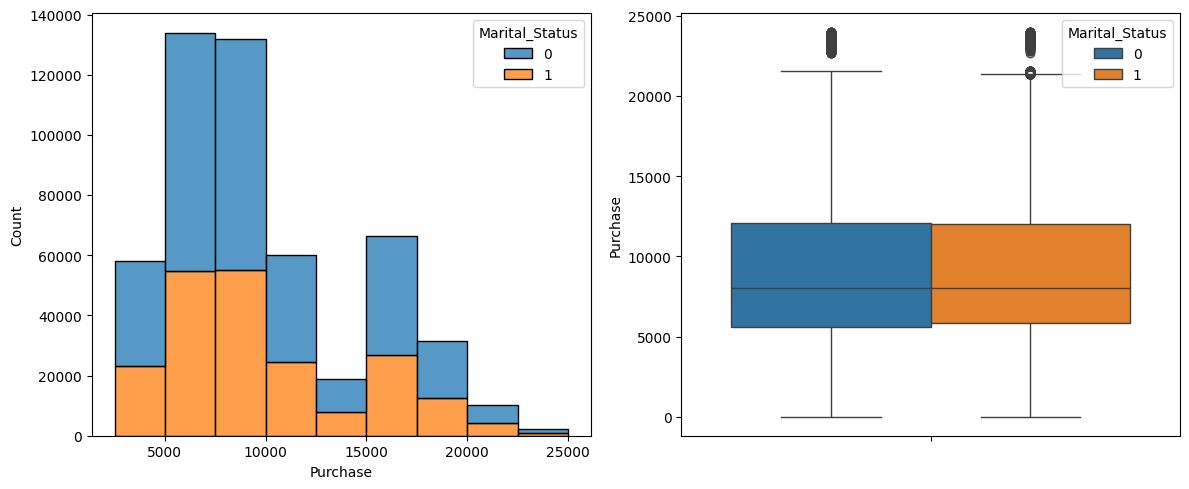

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bins = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
sns.histplot(data=df1, x='Purchase', hue='Marital_Status', bins=bins,  multiple='stack', ax=axes[0])
sns.boxplot(data=df1, y='Purchase', hue='Marital_Status', ax=axes[1])

plt.tight_layout()
plt.show()

### Observations:

* It can be seen that in almost all categories Males are present in greater numbers than Females and make purchases of slightly greater amount.

* Maerried people are greater in numbers than unmarried.

* People in age range of 26-35 are present in most numbers and make purchases of slightly greater amounts.

* There are most number f people in city category B and people in category C make purchases of greater amounts.

* Most people stay in current city for one year.

## Multivariate Analysis

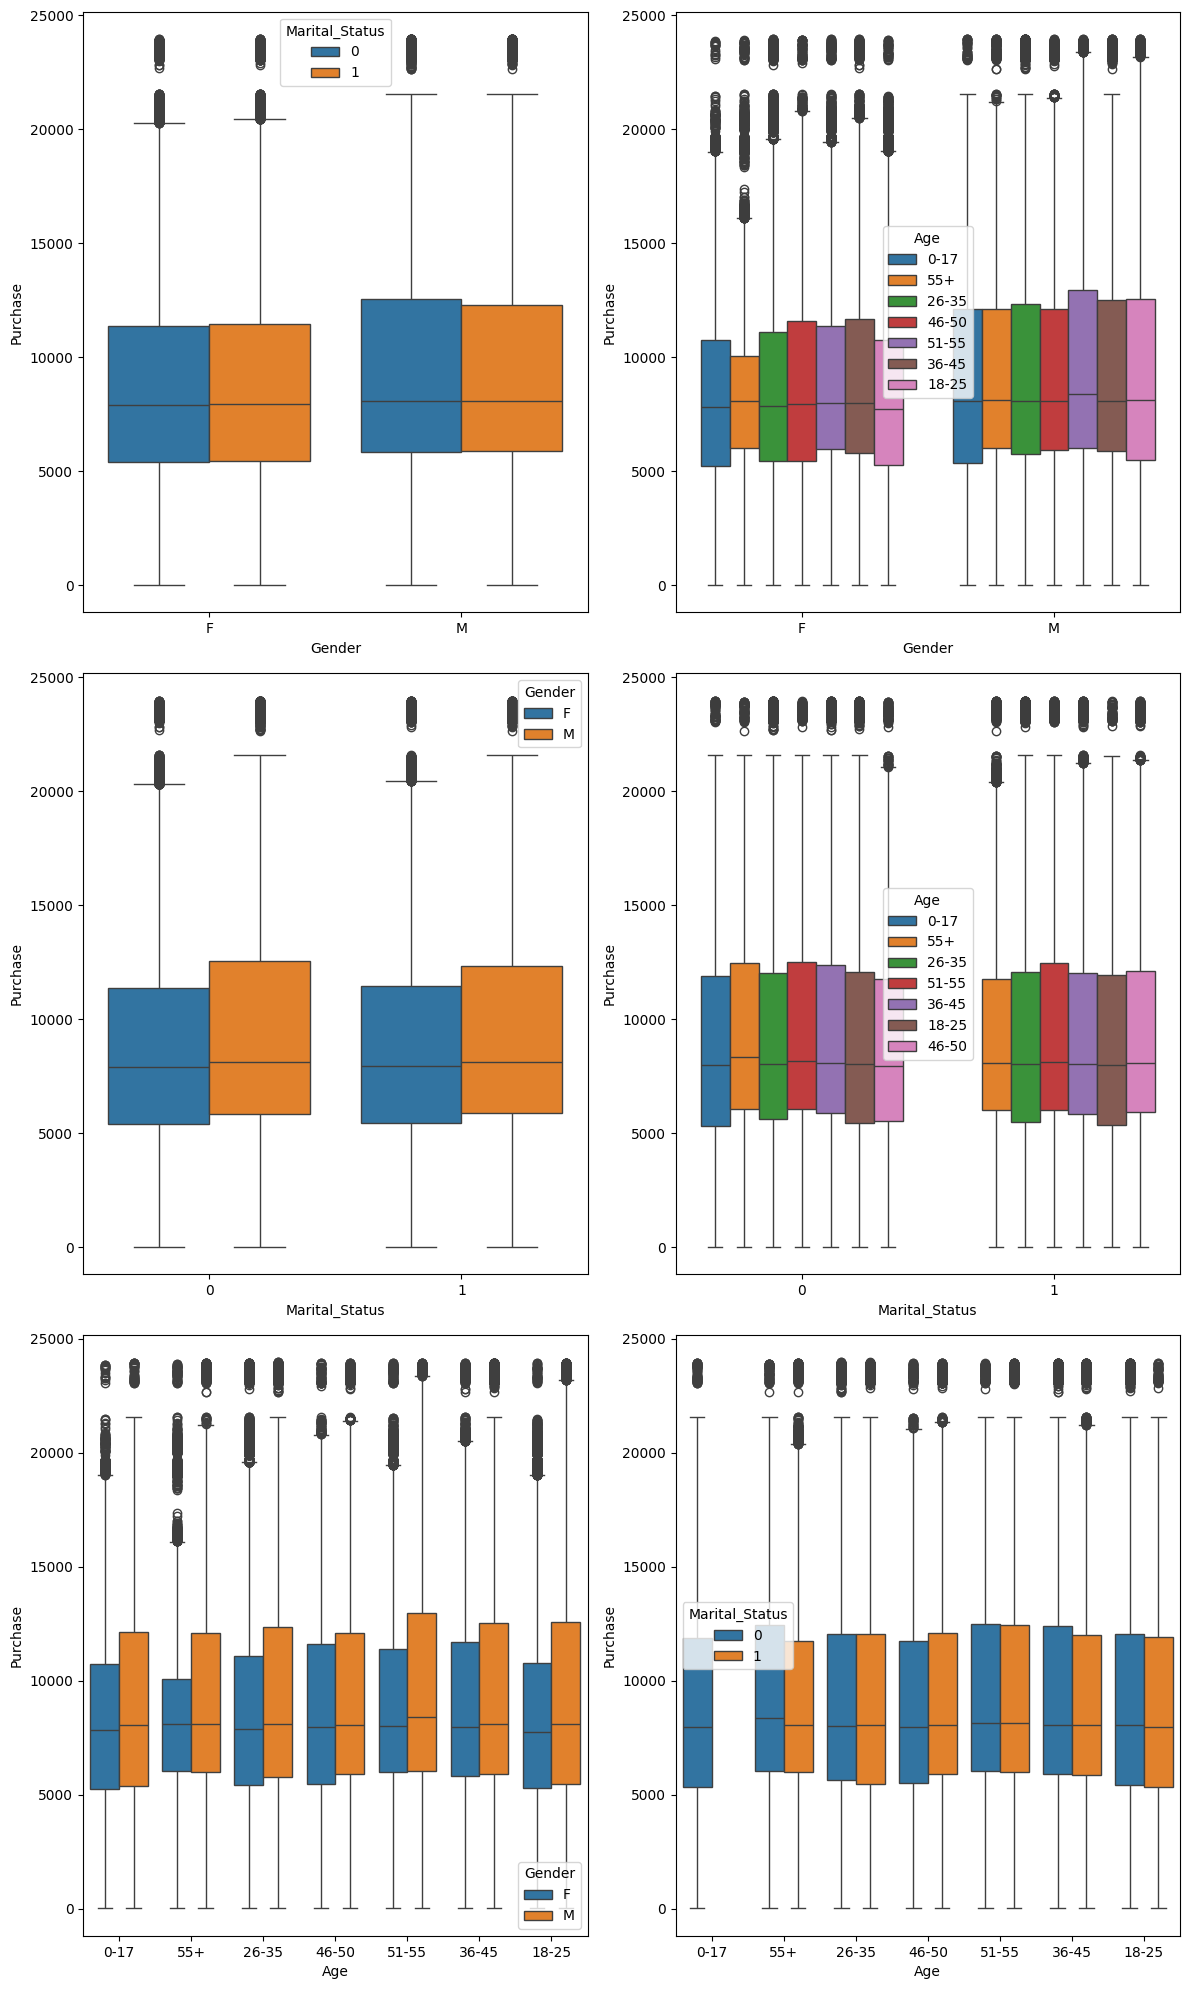

In [86]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))

cat = ['Gender', 'Marital_Status', 'Age']
cont = ['Purchase']

for i in range(3):
  k=0
  for j in range(3):
    if i!=j:
      sns.boxplot(data=df1, x=cat[i], y=cont[0], hue=cat[j], ax=axes[i, k])
      k+=1

plt.tight_layout()
plt.show()

### Observations:

* Unmarried males spend the most amount per transaction.

* Males in age 51-55 spend the most amount

* In age 0-17 there are no married people which is plausible.

* Married and unmarried people in age 51-55 spend the most.

* Unmarried people in age of 46-50 spend comparatively lesser.

## Gender wise spending analysis

In [87]:
df_female = df1[df1['Gender'] == 'F']
df_male = df1[df1['Gender'] == 'M']

In [88]:
mean_female = df_female['Purchase'].mean()
mean_male = df_male['Purchase'].mean()

print(f'Mean Purchase for Females: {mean_female}')
print(f'Mean Purchase for Males: {mean_male}')

Mean Purchase for Females: 8734.565765155476
Mean Purchase for Males: 9437.526040472265


### Observations:

* Male tend to spend more per transaction than Females

### Confidence Interval using CLT

In [89]:
def confidence_interval(data, confidence = 0.95):
  mu = np.mean(data)
  sigma = np.std(data)

  z = norm.ppf(1-(1-confidence)/2)

  n = len(data)

  upper_limit = mu + (z * (sigma / np.sqrt(n)))
  lower_limit = mu - (z * (sigma / np.sqrt(n)))

  return (lower_limit, upper_limit)

In [90]:
ci_female_90 = confidence_interval(df_female['Purchase'], 0.90)
ci_male_90 = confidence_interval(df_male['Purchase'], 0.90)

ci_female_95 = confidence_interval(df_female['Purchase'], 0.95)
ci_male_95 = confidence_interval(df_male['Purchase'], 0.95)

ci_female_99 = confidence_interval(df_female['Purchase'], 0.99)
ci_male_99 = confidence_interval(df_male['Purchase'], 0.99)

print(f'The mean value for females with 90% confidence interval lies in the range of {ci_female_90}')
print(f'The mean value for males with 90% confidence interval lies in the range of {ci_male_90}')
print()
print(f'The mean value for females with 95% confidence interval lies in the range of {ci_female_95}')
print(f'The mean value for males with 95% confidence interval lies in the range of {ci_male_95}')
print()
print(f'The mean value for females with 99% confidence interval lies in the range of {ci_female_99}')
print(f'The mean value for males with 99% confidence interval lies in the range of {ci_male_99}')

The mean value for females with 90% confidence interval lies in the range of (np.float64(8713.28791298587), np.float64(8755.843617325081))
The mean value for males with 90% confidence interval lies in the range of (np.float64(9424.51251301251), np.float64(9450.539567932019))

The mean value for females with 95% confidence interval lies in the range of (np.float64(8709.211640485983), np.float64(8759.919889824969))
The mean value for males with 95% confidence interval lies in the range of (np.float64(9422.019466078644), np.float64(9453.032614865886))

The mean value for females with 99% confidence interval lies in the range of (np.float64(8701.244797114914), np.float64(8767.886733196037))
The mean value for males with 99% confidence interval lies in the range of (np.float64(9417.146947266567), np.float64(9457.905133677963))


### Observations:

* We can see that mean spending values per transaction of males and females do not overlap in any confidence interval.
* This shows that the difference is statistically significant and it can be concluded that gender is impacting spending.
* As the confidence interval is increasing the impact can be seen as the range of values are becoming wider with more confidence interval value.

### Effect of sample size

In [91]:
df1['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [92]:
df1.shape

(550068, 10)

In [93]:
male_sample_sizes = [10, 100, 1000, 10000, 100000, 400000]
female_sample_sizes = [10, 100, 1000, 10000, 50000, 100000]
overall_sample_sizes = [10, 100, 1000, 10000, 100000, 500000]

for i in range(6):
  female_sample = df_female.sample(female_sample_sizes[i])
  male_sample = df_male.sample(male_sample_sizes[i])
  overall_sample = df1.sample(overall_sample_sizes[i])

  ci_female = confidence_interval(female_sample['Purchase'], 0.95)
  ci_male = confidence_interval(male_sample['Purchase'], 0.95)
  ci_overall = confidence_interval(overall_sample['Purchase'], 0.95)

  print(f'The mean value for females for a sample size of {female_sample_sizes[i]} with 95% confidence interval lies in the range of {ci_female}')
  print(f'The mean value for males for a sample size of {male_sample_sizes[i]} with 95% confidence interval lies in the range of {ci_male}')
  print(f'The mean value for overall for a sample size of {overall_sample_sizes[i]} with 95% confidence interval lies in the range of {ci_overall}')
  print()

The mean value for females for a sample size of 10 with 95% confidence interval lies in the range of (np.float64(5806.31012154486), np.float64(9638.88987845514))
The mean value for males for a sample size of 10 with 95% confidence interval lies in the range of (np.float64(5844.136164584179), np.float64(12702.063835415822))
The mean value for overall for a sample size of 10 with 95% confidence interval lies in the range of (np.float64(5753.313981849531), np.float64(12216.08601815047))

The mean value for females for a sample size of 100 with 95% confidence interval lies in the range of (np.float64(7637.471269144546), np.float64(9419.948730855453))
The mean value for males for a sample size of 100 with 95% confidence interval lies in the range of (np.float64(8174.554849226591), np.float64(10012.865150773408))
The mean value for overall for a sample size of 100 with 95% confidence interval lies in the range of (np.float64(8040.0043003738165), np.float64(9909.515699626183))

The mean value

### Observations:

* It can be seen that with more samples the width of range of mean values becomes narrower for males, females and overall.
* The value of mean becomes more and more certain and precise.

## Married vs Unmarried spending analysis

In [94]:
df_married = df1[df1['Marital_Status'] == 1]
df_unmarried = df1[df1['Marital_Status'] == 0]

In [95]:
mean_married = df_married['Purchase'].mean()
mean_unmarried = df_unmarried['Purchase'].mean()

print(f'Mean Purchase for Married: {mean_married}')
print(f'Mean Purchase for Unmarried: {mean_unmarried}')

Mean Purchase for Married: 9261.174574082374
Mean Purchase for Unmarried: 9265.907618921507


### Observations:

* Looking at mean values of married and unmarried people we can't conclude if there is any effect of marital status on the mean purchase value as both values are nearly same.

### Confidence Interval using CLT

In [96]:
ci_married_90 = confidence_interval(df_married['Purchase'], 0.90)
ci_unmarried_90 = confidence_interval(df_unmarried['Purchase'], 0.90)

ci_married_95 = confidence_interval(df_married['Purchase'], 0.95)
ci_unmarried_95 = confidence_interval(df_unmarried['Purchase'], 0.95)

ci_married_99 = confidence_interval(df_married['Purchase'], 0.99)
ci_unmarried_99 = confidence_interval(df_unmarried['Purchase'], 0.99)

print(f'The mean value for married with 90% confidence interval lies in the range of {ci_married_90}')
print(f'The mean value for unmarried with 90% confidence interval lies in the range of {ci_unmarried_90}')
print()
print(f'The mean value for married with 95% confidence interval lies in the range of {ci_married_95}')
print(f'The mean value for unmarried with 95% confidence interval lies in the range of {ci_unmarried_95}')
print()
print(f'The mean value for married with 99% confidence interval lies in the range of {ci_married_99}')
print(f'The mean value for unmarried with 99% confidence interval lies in the range of {ci_unmarried_99}')

The mean value for married with 90% confidence interval lies in the range of (np.float64(9243.790752476114), np.float64(9278.558395688633))
The mean value for unmarried with 90% confidence interval lies in the range of (np.float64(9251.396408167155), np.float64(9280.418829675858))

The mean value for married with 95% confidence interval lies in the range of (np.float64(9240.460473019726), np.float64(9281.88867514502))
The mean value for unmarried with 95% confidence interval lies in the range of (np.float64(9248.616444810585), np.float64(9283.198793032429))

The mean value for married with 99% confidence interval lies in the range of (np.float64(9233.951630735093), np.float64(9288.397517429654))
The mean value for unmarried with 99% confidence interval lies in the range of (np.float64(9243.183164125909), np.float64(9288.632073717105))


### Observations:

* We can see that mean spending values per transaction of married and unmarried overlap in the confidence intervals.
* This shows that the difference is not statistically significant.
* As the confidence interval is increasing the impact can be seen as the range of values are becoming wider with more confidence interval value.

### Effect of sample size

In [97]:
df1['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [98]:
df1.shape

(550068, 10)

In [99]:
married_sample_sizes = [10, 100, 1000, 10000, 100000, 200000]
unmarried_sample_sizes = [10, 100, 1000, 10000, 100000, 200000]

for i in range(6):
  married_sample = df_married.sample(married_sample_sizes[i])
  unmarried_sample = df_unmarried.sample(unmarried_sample_sizes[i])

  ci_married = confidence_interval(married_sample['Purchase'], 0.95)
  ci_unmarried = confidence_interval(unmarried_sample['Purchase'], 0.95)

  print(f'The mean value for married for a sample size of {married_sample_sizes[i]} with 95% confidence interval lies in the range of {ci_married}')
  print(f'The mean value for unmarried for a sample size of {unmarried_sample_sizes[i]} with 95% confidence interval lies in the range of {ci_unmarried}')
  print()

The mean value for married for a sample size of 10 with 95% confidence interval lies in the range of (np.float64(6512.318391581532), np.float64(10630.08160841847))
The mean value for unmarried for a sample size of 10 with 95% confidence interval lies in the range of (np.float64(8111.38424443162), np.float64(13799.61575556838))

The mean value for married for a sample size of 100 with 95% confidence interval lies in the range of (np.float64(8501.7378444975), np.float64(10553.702155502498))
The mean value for unmarried for a sample size of 100 with 95% confidence interval lies in the range of (np.float64(7124.3571202416915), np.float64(8941.142879758308))

The mean value for married for a sample size of 1000 with 95% confidence interval lies in the range of (np.float64(8875.758783755178), np.float64(9487.23521624482))
The mean value for unmarried for a sample size of 1000 with 95% confidence interval lies in the range of (np.float64(9042.7207234341), np.float64(9657.0132765659))

The mea

### Observations:

* It can be seen that with more samples the width of range of mean values becomes narrower for both married and unmarried.
* The value of mean becomes more and more certain and precise.

## Age-wise spending analysis

In [100]:
df1['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [101]:
df_age_0_17 = df1[df1['Age'] == '0-17']
df_age_18_25 = df1[df1['Age'] == '18-25']
df_age_26_35 = df1[df1['Age'] == '26-35']
df_age_36_45 = df1[df1['Age'] == '36-45']
df_age_46_50 = df1[df1['Age'] == '46-50']
df_age_51_55 = df1[df1['Age'] == '51-55']
df_age_55plus = df1[df1['Age'] == '55+']

In [102]:
mean_age_0_17 = df_age_0_17['Purchase'].mean()
mean_age_18_25 = df_age_18_25['Purchase'].mean()
mean_age_26_35 = df_age_26_35['Purchase'].mean()
mean_age_36_45 = df_age_36_45['Purchase'].mean()
mean_age_46_50 = df_age_46_50['Purchase'].mean()
mean_age_51_55 = df_age_51_55['Purchase'].mean()
mean_age_55plus = df_age_55plus['Purchase'].mean()

print(f'Mean Purchase for 0-17 range: {mean_age_0_17}')
print(f'Mean Purchase for 18-25 range: {mean_age_18_25}')
print(f'Mean Purchase for 26-35 range: {mean_age_26_35}')
print(f'Mean Purchase for 36-45 range: {mean_age_36_45}')
print(f'Mean Purchase for 46-50 range: {mean_age_46_50}')
print(f'Mean Purchase for 51-55 range: {mean_age_51_55}')
print(f'Mean Purchase for 55+ range: {mean_age_55plus}')

Mean Purchase for 0-17 range: 8933.464640444974
Mean Purchase for 18-25 range: 9169.663606261289
Mean Purchase for 26-35 range: 9252.690632869888
Mean Purchase for 36-45 range: 9331.350694917874
Mean Purchase for 46-50 range: 9208.625697468327
Mean Purchase for 51-55 range: 9534.808030960236
Mean Purchase for 55+ range: 9336.280459449405


### Observations:

* Looking at mean values of different ages it seems that mean values are increasing with age and highest purchase value is in 51-55 age range.

### Confidence Interval using CLT

In [103]:
ci_age_0_17 = confidence_interval(df_age_0_17['Purchase'], 0.95)
ci_age_18_25 = confidence_interval(df_age_18_25['Purchase'], 0.95)
ci_age_26_35 = confidence_interval(df_age_26_35['Purchase'], 0.95)
ci_age_36_45 = confidence_interval(df_age_36_45['Purchase'], 0.95)
ci_age_46_50 = confidence_interval(df_age_46_50['Purchase'], 0.95)
ci_age_51_55 = confidence_interval(df_age_51_55['Purchase'], 0.95)
ci_age_55plus = confidence_interval(df_age_55plus['Purchase'], 0.95)

print(f'The mean value for 0-17 age range with 95% confidence interval lies in the range of {ci_age_0_17}')
print(f'The mean value for 18-25 age range with 95% confidence interval lies in the range of {ci_age_18_25}')
print(f'The mean value for 26-35 age range with 95% confidence interval lies in the range of {ci_age_26_35}')
print(f'The mean value for 36-45 age range with 95% confidence interval lies in the range of {ci_age_36_45}')
print(f'The mean value for 46-50 age range with 95% confidence interval lies in the range of {ci_age_46_50}')
print(f'The mean value for 51-55 age range with 95% confidence interval lies in the range of {ci_age_51_55}')
print(f'The mean value for 55+ age range with 95% confidence interval lies in the range of {ci_age_55plus}')

The mean value for 0-17 age range with 95% confidence interval lies in the range of (np.float64(8851.950669457377), np.float64(9014.97861143257))
The mean value for 18-25 age range with 95% confidence interval lies in the range of (np.float64(9138.40810556528), np.float64(9200.919106957297))
The mean value for 26-35 age range with 95% confidence interval lies in the range of (np.float64(9231.733724119113), np.float64(9273.647541620663))
The mean value for 36-45 age range with 95% confidence interval lies in the range of (np.float64(9301.669545864605), np.float64(9361.031843971143))
The mean value for 46-50 age range with 95% confidence interval lies in the range of (np.float64(9163.085640896097), np.float64(9254.165754040558))
The mean value for 51-55 age range with 95% confidence interval lies in the range of (np.float64(9483.992132719022), np.float64(9585.623929201449))
The mean value for 55+ age range with 95% confidence interval lies in the range of (np.float64(9269.300391858294), 

### Observations:

* We can see that mean spending values per transaction of people in age range of 18-25 and 46-50 overlap somewhat.
* The spending values of 55+ people overlap with people in a wider age range of 26-50.

## Final conclusions:

* Male customers tend to spend more amount per transaction.

* Married and unmarried customers have overlapping spending amounts.

* People in age of 26-50 spend the most.

## Recommendations:

* Offers and buy one get one like offers for male customers.

* Provide discounts and offers and promote female oriented products to increase sales.

* Create family packs and bundles products for married people.

* Give discounts on products targeted for young people(18-25) and announce some subscriptions for them to increase their retention in turn helping total profit from young people.

* Exclusive and premium products for people in age 25-50.